# Q1. Explain GET and POST methods.

## GET Method:

Purpose: Used for retrieving data from the server.

Data in URL: Parameters are appended to the URL in the form of a query string. For example, www.example.com/resource?param1=value1&param2=value2.

Visibility: Data is visible in the URL, making it less secure.

Caching: Results can be cached, as the request is visible in the browser's history.

Idempotent: Multiple identical requests will produce the same result.

Example in HTML form:

In [ ]:
<form action="/example" method="GET">
    <input type="text" name="param1" value="value1">
    <input type="text" name="param2" value="value2">
    <input type="submit" value="Submit">
</form>

Example in Python using requests library:

In [ ]:
import requests

params = {'param1': 'value1', 'param2': 'value2'}
response = requests.get('http://www.example.com/resource', params=params)

## POST Method:

Purpose: Used for submitting data to be processed to a specified resource.

Data in Request Body: Parameters are included in the request body, not in the URL. This is useful for sensitive or large amounts of data.

Visibility: Data is not visible in the URL, providing a more secure way to transmit data.

Caching: Results are typically not cached, as the request and its data are not visible in the URL.

Idempotent: May or may not be idempotent; it depends on the server implementation.

Example in HTML form:

In [ ]:
html
Copy code
<form action="/example" method="POST">
    <input type="text" name="param1" value="value1">
    <input type="text" name="param2" value="value2">
    <input type="submit" value="Submit">
</form>

Example in Python using requests library:

In [ ]:
import requests

data = {'param1': 'value1', 'param2': 'value2'}
response = requests.post('http://www.example.com/resource', data=data)

In summary, use the GET method when you want to retrieve data, and use the POST method when you want to send data to the server for processing.

# Q2. Why is request used in Flask?

In Flask, the request object is used to access and handle incoming HTTP requests from clients (e.g., web browsers). It is a part of the Flask framework and provides a convenient way to access various aspects of the request, such as form data, URL parameters, cookies, and more.

Here are some common use cases for the request object in Flask:

### Accessing Form Data:

When a user submits a form on a web page, the form data is included in the HTTP request. The request object allows you to access this data easily. For example, request.form['fieldname'] retrieves the value of a form field.

### Handling URL Parameters:

If your application uses URL parameters (e.g., /endpoint?param1=value1&param2=value2), you can use request.args.get('param1') to retrieve the values of these parameters.

### Working with Cookies:

Cookies are often used to store small pieces of information on the client's browser. The request object provides methods to read and set cookies, such as request.cookies.get('cookie_name').

### Accessing Headers:

You can access the headers sent by the client using methods like request.headers['Header-Name'].

### File Uploads:

When handling file uploads, the request object allows you to access the uploaded files through request.files['file'].

### Accessing the Request Method:

You can determine the HTTP method used in the request (e.g., GET, POST) by using request.method.


Here's a simple example of using the request object in a Flask route:

In [ ]:
from flask import Flask, request

app = Flask(__name__)

@app.route('/example', methods=['POST'])
def example():
    if request.method == 'POST':
        data = request.form['param1']
        return f"Received POST request with param1 = {data}"
    else:
        return "Only POST requests are allowed on this endpoint"


In this example, the request object is used to access form data in the case of a POST request to the /example endpoint.

# Q3. Why is redirect() used in Flask?


In Flask, the redirect() function is used to redirect the client's web browser to a different URL. This is useful in various scenarios, such as after processing a form submission, when you want to guide the user to a different page or route.


The redirect() function is part of the flask module, and it returns a response object that, when sent back to the client, instructs the browser to navigate to the specified URL.


Here's a common use case for redirect() in a Flask route:

In [ ]:
from flask import Flask, redirect, url_for

app = Flask(__name__)

@app.route('/')
def index():
    # Redirect to the 'hello' endpoint
    return redirect(url_for('hello'))

@app.route('/hello')
def hello():
    return 'Hello, World!'

if __name__ == '__main__':
    app.run(debug=True)


In this example, when a user accesses the root URL ('/'), the index route redirects them to the hello route using redirect(url_for('hello')). The url_for() function generates the URL for the specified endpoint ('hello' in this case).


Some common scenarios where redirect() is used include:

### After Form Submission:

After a user submits a form, you may want to redirect them to a different page to display a success message or to another part of your application.

### URL Shortening:

If your application involves generating short URLs, you can use redirect() to send users to the original URL when they access the shortened version.

### Authentication and Authorization:

After a user logs in or logs out, you might want to redirect them to a specific page based on the authentication status.

Here's another example illustrating the use of redirect() after processing a form submission:

In [ ]:
from flask import Flask, render_template, request, redirect, url_for

app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/process_form', methods=['POST'])
def process_form():
    # Process the form data here
    # ...

    # Redirect to a different page after processing
    return redirect(url_for('thank_you'))

@app.route('/thank_you')
def thank_you():
    return 'Thank you for submitting the form!'

if __name__ == '__main__':
    app.run(debug=True)


In this example, after processing a form submitted to the /process_form endpoint, the user is redirected to the thank_you endpoint.

# Q4. What are templates in Flask? Why is the render_template() function used?


In Flask, templates are used to separate the presentation layer (HTML, CSS) from the application logic. Templates allow you to create dynamic HTML pages by embedding placeholders for dynamic content. The render_template() function in Flask is used to render these templates and return the resulting HTML to the client.

Here's a breakdown of templates and the render_template() function in Flask:

### Templates:

Templates in Flask are typically HTML files with placeholders (usually enclosed in double curly braces {{ ... }}) for dynamic content.
Templates can include control structures (such as for loops and if statements) and can inherit from other templates to encourage code reusability.
Flask uses the Jinja2 template engine by default, which provides powerful template functionality.

### render_template() Function:

The render_template() function is part of Flask's flask module and is used to render HTML templates.
It takes the name of the template file (relative to the templates folder) and optional variables that will be passed to the template for dynamic content.
The function renders the template, substitutes the placeholders with actual data, and returns the resulting HTML as a response to the client.

Here's a simple example illustrating the use of render_template() in a Flask application:

In [ ]:
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def index():
    # Pass a variable to the template
    user_name = "John"
    return render_template('index.html', name=user_name)

if __name__ == '__main__':
    app.run(debug=True)


In this example, there is an index.html template file in the templates folder. The render_template('index.html', name=user_name) line passes the name variable to the template. Inside the index.html file, you might have something like:

In [ ]:
<!DOCTYPE html>
<html>
<head>
    <title>Flask Template Example</title>
</head>
<body>
    <h1>Hello, {{ name }}!</h1>
</body>
</html>


When the user accesses the / route, Flask renders the index.html template, replacing {{ name }} with the actual value of the name variable. The resulting HTML is then sent to the client's browser.

Using templates and the render_template() function helps maintain a clean separation between the application logic and the presentation, making it easier to manage and update your web pages.

# Q5. Create a simple API. Use Postman to test it. Attach the screenshot of the output in the Jupyter Notebook.

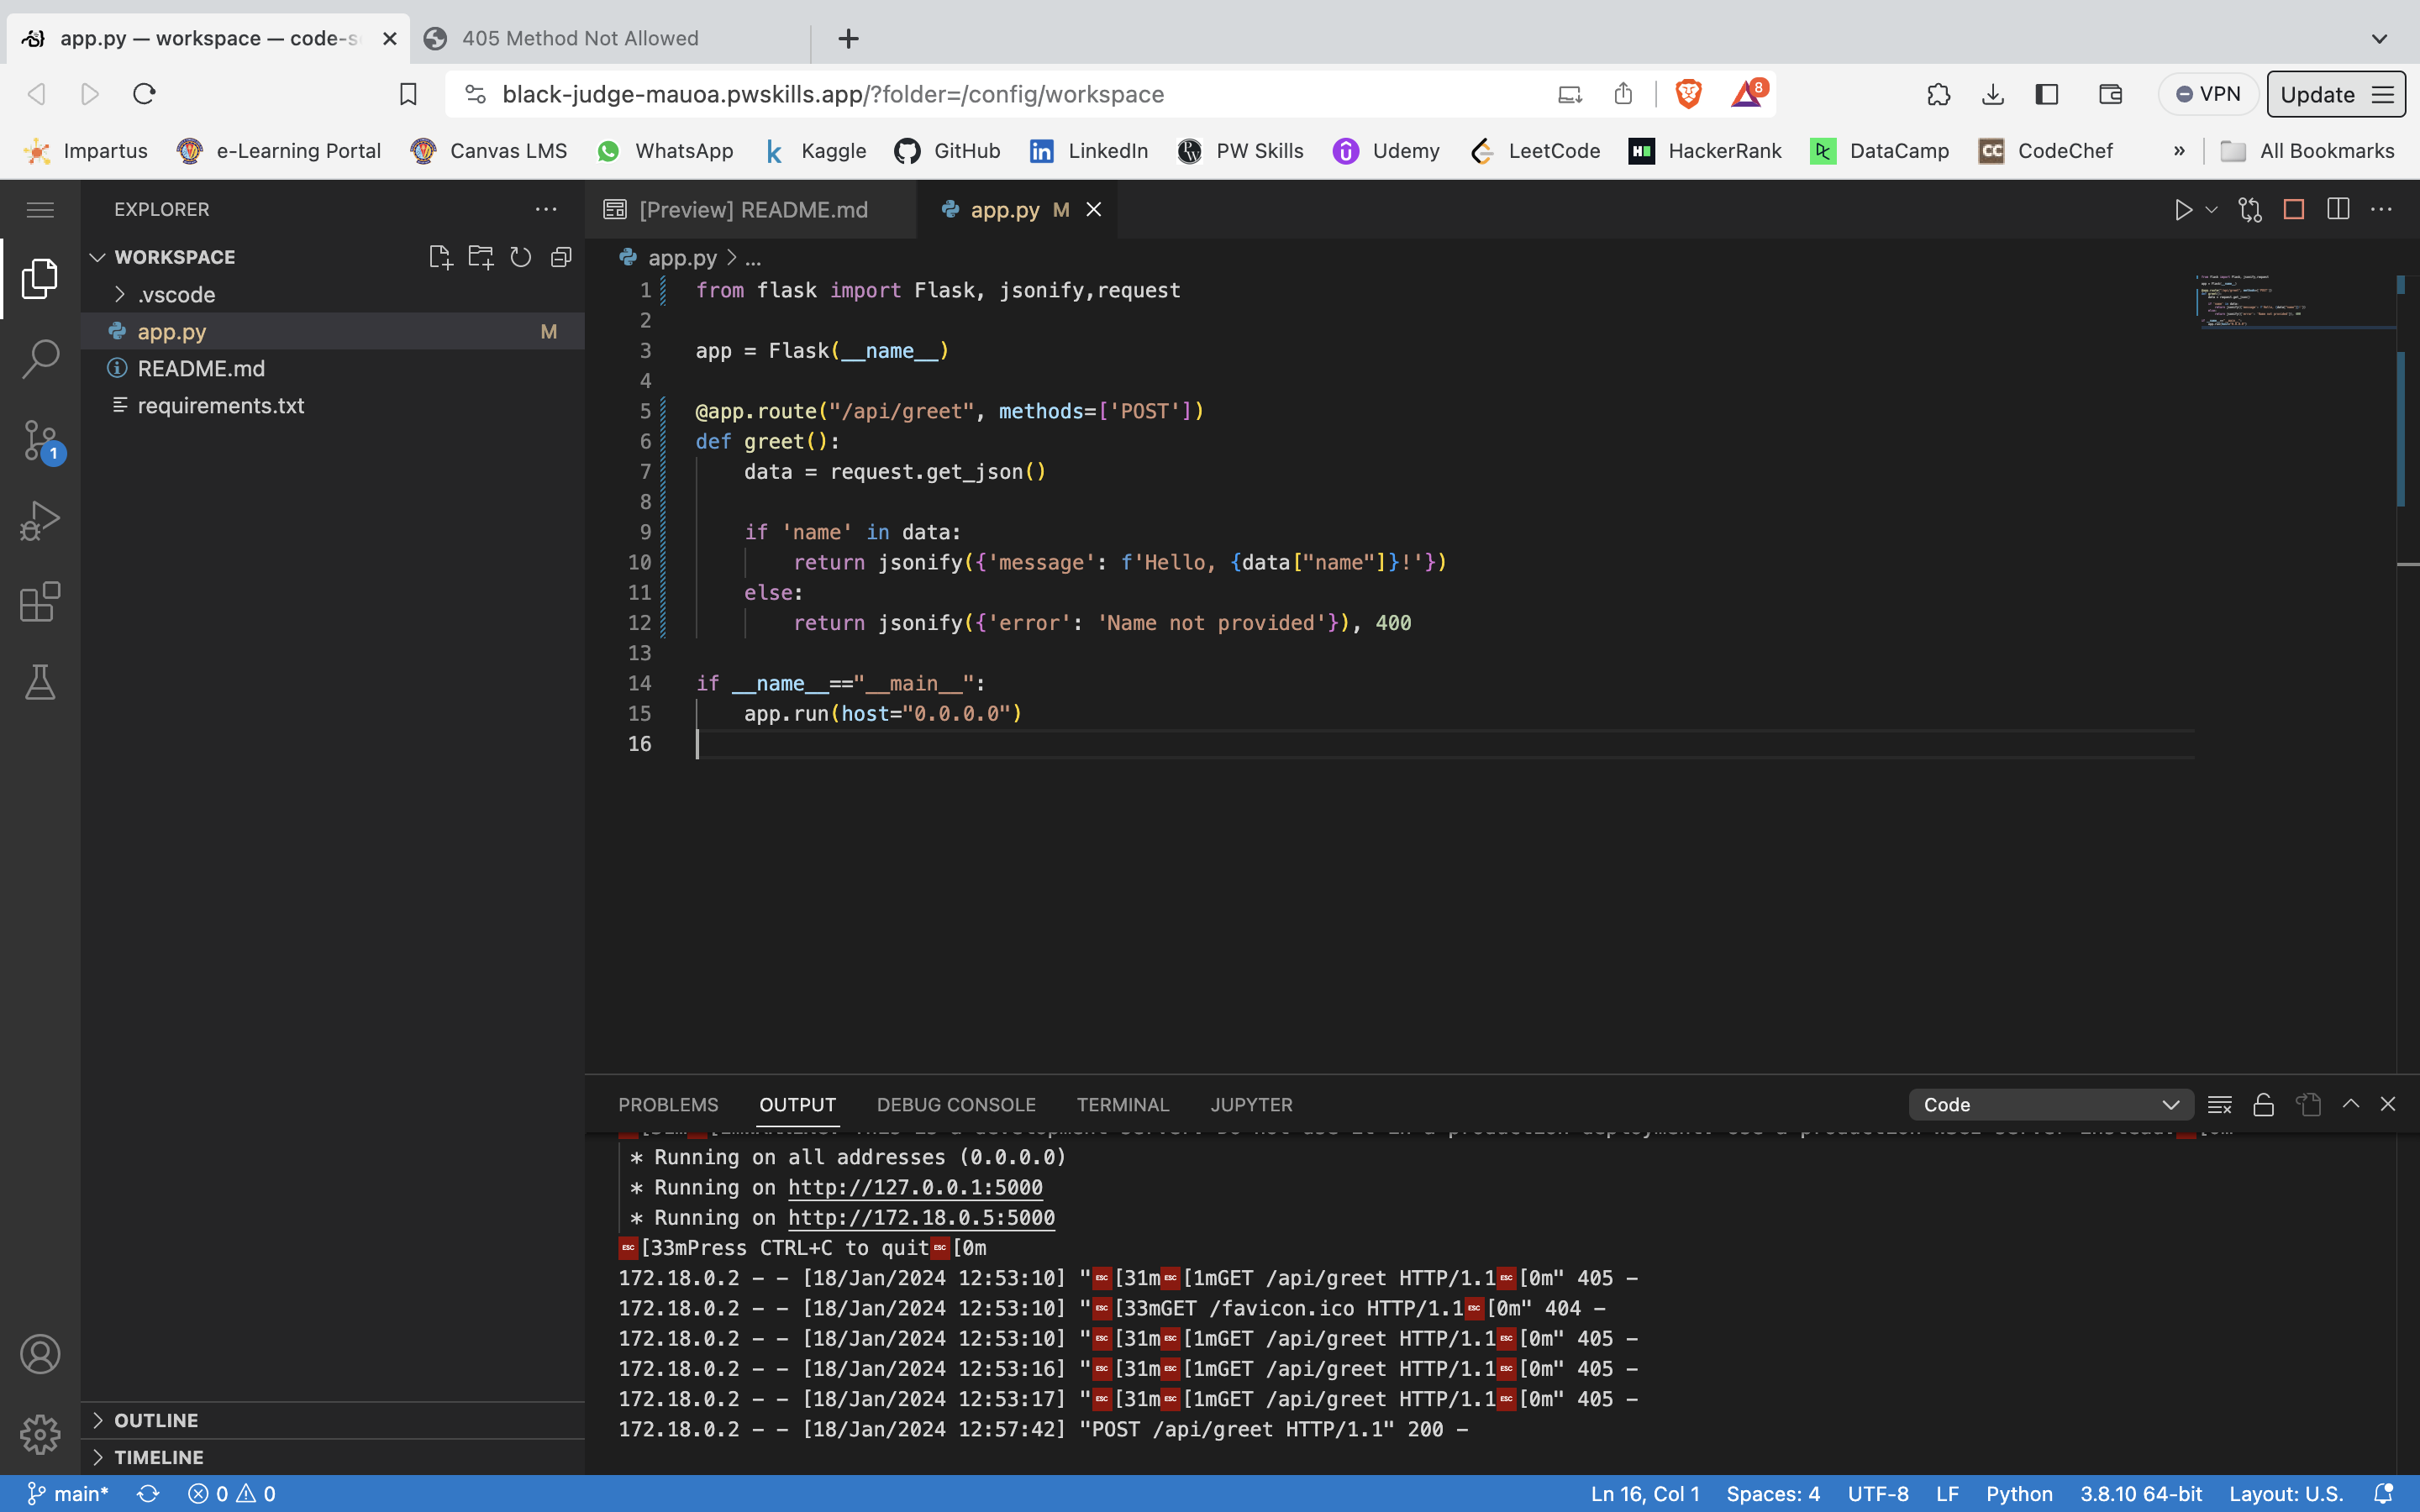

In [16]:
from IPython.display import Image
Image(filename='POST_app.png')

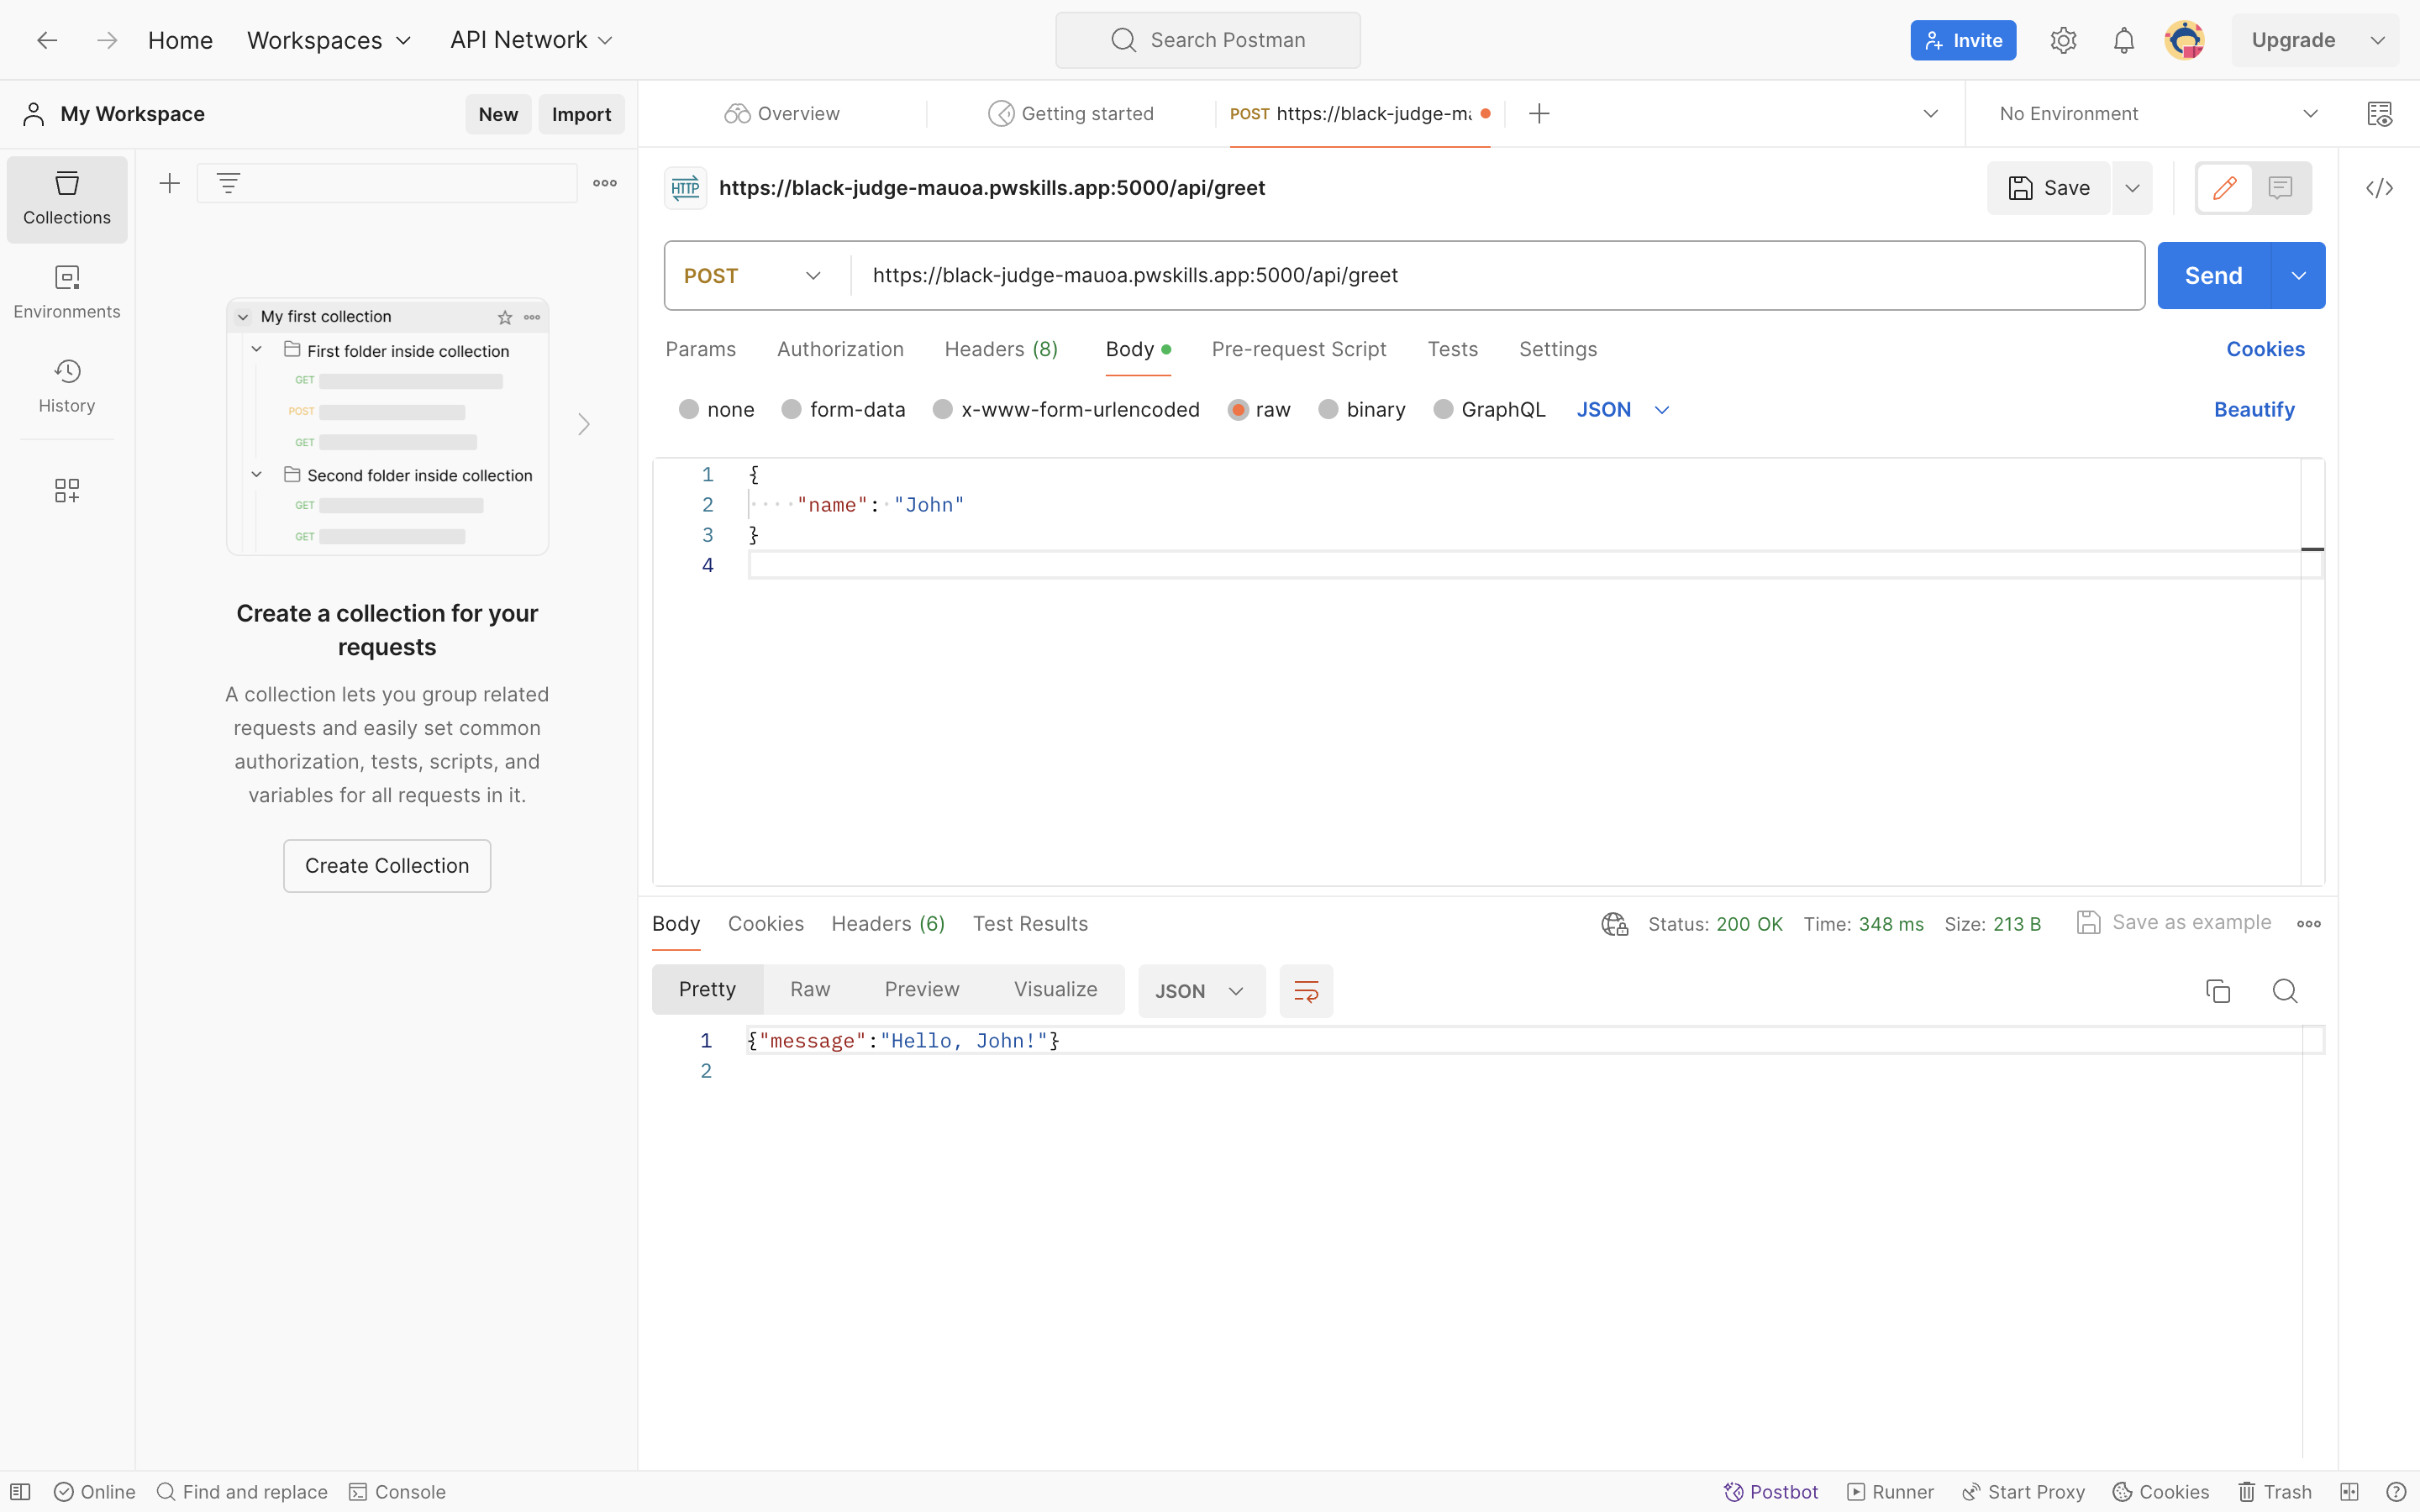

In [18]:
Image(filename='POSTMAN.png')